In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
players = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectNBA/data/players.csv")
players.head()

,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,...,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight
0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,...,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb
1,abdulza01,"April 7, 1946","Brooklyn, New York",1.2,42.8,NaN,72.8,505,15.1,9.0,...,5th overall,1st round,Cincinnati Royals,1968,6-9,"John Jay in Brooklyn, New York",Zaid Abdul-Aziz,Power Forward and Center,Right,235lb
2,abdulka01,"April 16, 1947","New York, New York",3.6,55.9,5.6,72.1,1560,24.6,24.6,...,1st overall,1st round,Milwaukee Bucks,1969,7-2,"Power Memorial in New York, New York",Kareem Abdul-Jabbar,Center,Right,225lb
3,abdulma02,"March 9, 1969","Gulfport, Mississippi",3.5,44.2,35.4,90.5,586,15.4,14.6,...,3rd overall,1st round,Denver Nuggets,1990,6-1,"Gulfport in Gulfport, Mississippi",Mahmoud Abdul-Rauf,Point Guard,Right,162lb
4,abdulta01,"November 3, 1974","Maisons Alfort, France",1.1,41.7,23.7,70.3,236,11.4,7.8,...,11th overall,1st round,Sacramento Kings,1997,6-6,"Lycee Aristide Briand in Evreux, France",Tariq Abdul-Wahad,Shooting Guard,Right,223lb


In [3]:
salaries = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectNBA/data/salaries_1985to2018.csv")
salaries.head()

,league,player_id,salary,season,season_end,season_start,team
0,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers
1,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers
2,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics
3,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics
4,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings


Unimos ambas tablas de datos en un único dataset.

In [4]:
fulldata=pd.merge(salaries,players, left_on='player_id',right_on='_id')
fulldata.shape

(14163, 31)

In [5]:
fulldata.head()

,league,player_id,salary,season,season_end,season_start,team,_id,birthDate,birthPlace,...,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight
0,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers,abdelal01,"June 24, 1968","Cairo, Egypt",...,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb
1,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers,abdelal01,"June 24, 1968","Cairo, Egypt",...,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb
2,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics,abdelal01,"June 24, 1968","Cairo, Egypt",...,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb
3,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics,abdelal01,"June 24, 1968","Cairo, Egypt",...,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb
4,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings,abdelal01,"June 24, 1968","Cairo, Egypt",...,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb


Podemos graficar como han cambiado los salarios de los jugadores en los distintas temporadas.

Text(0.5, 1.0, 'salarios vs año')

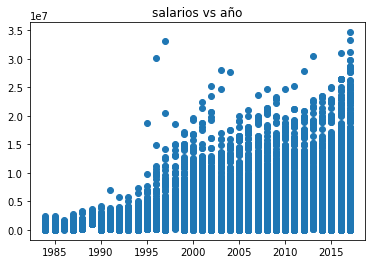

In [9]:
plt.plot(fulldata['season_start'],fulldata['salary'],'o')
plt.title('salarios vs año')

Claramente los salarios aumentan conforme aumentan los años. Esto se puede deber a la inflación del dolar, como tambien a un amuento de la popularidad de la NBA, resultando en un aumento de los patrocinadores y en consecuencia, un aumento de los salarios por jugador, entre otras causas. Para no dejar que este aumento paulatino de los salarios sesgue los modelos de regresión, podríamos eliminar los efectos de la inflación en salarios, ya que esta información es de público conocimiento a diferencia de la aumento producto de la creciente popularidad de la NBA que es dificil de mensurar.

Importamos los datos de inflación de USA extraidos de World Bank.

In [10]:
inflacion = pd.read_csv('ca52c378-bc1e-42c9-a4fb-da1bc1771d63_Data.csv')

In [11]:
inflacion.head()

,Series Name,Country Name,Time,Value
0,"Inflation, consumer prices (annual %)",United States,1971.0,4.29276668813045
1,"Inflation, consumer prices (annual %)",United States,1972.0,3.27227824655283
2,"Inflation, consumer prices (annual %)",United States,1973.0,6.17776006377041
3,"Inflation, consumer prices (annual %)",United States,1974.0,11.0548048048048
4,"Inflation, consumer prices (annual %)",United States,1975.0,9.14314686496534


In [12]:
inflacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Series Name   52 non-null     object 
 1   Country Name  50 non-null     object 
 2   Time          50 non-null     float64
 3   Value         50 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.8+ KB


Cambiamos el type de las columnas de Time y Value para poder calcular al inflacion acumulada año a año.

In [13]:
inflacion['Value'] = pd.to_numeric(inflacion['Value'],errors='coerce')

Text(0.5, 1.0, 'Inflacion % por año en USA')

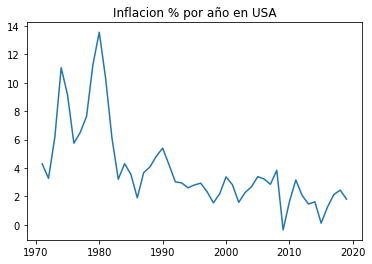

In [14]:
plt.plot(inflacion['Time'],inflacion['Value'])
plt.title('Inflacion % por año en USA')

Del grafico se observa que la inflación de USA en los ultimos 50 años ha sido significativa que afecta considerablemente los salarios de los jugadores.

In [15]:
fulldata['season_start'].min()

1984

In [16]:
fulldata['season_start'].max()

2017

Debemos caluclar la inflacion acumulada de USA desde 1984 hasta el 2017.

In [17]:
inflacion['acumulada'] = inflacion['Value'].loc[inflacion['Time'] >= 1984.0].cumsum()

Para ajustar por inflacion: si S es el salario del jugador en el año t, el salario S' en un año anterior t' es $$ S' = S /(1+I)$$ donde I es la inflacion acumulada entre los años t y t'.

In [18]:
A = fulldata[['season_start','salary']]
B = inflacion[['Time','acumulada']].loc[ inflacion['Time'] >= 1984]
B['Time'] = B['Time'].astype(int)
B = B.rename(columns={'Time':'season_start'})

In [19]:
C = A.merge(B, on='season_start', how='left')
C.head()

,season_start,salary,acumulada
0,1990,395000,27.711491
1,1991,494000,31.946455
2,1992,500000,34.975275
3,1993,805000,37.926932
4,1994,650000,40.534373


In [20]:
fulldata['salary_adj'] = C['salary']/(1+C['acumulada']/100)
fulldata.head()

,league,player_id,salary,season,season_end,season_start,team,_id,birthDate,birthPlace,...,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight,salary_adj
0,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers,abdelal01,"June 24, 1968","Cairo, Egypt",...,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb,309290.884054
1,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers,abdelal01,"June 24, 1968","Cairo, Egypt",...,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb,374394.294709
2,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics,abdelal01,"June 24, 1968","Cairo, Egypt",...,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb,370438.216027
3,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics,abdelal01,"June 24, 1968","Cairo, Egypt",...,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb,583642.360317
4,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings,abdelal01,"June 24, 1968","Cairo, Egypt",...,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb,462520.296298


En la columna de salario ajustado, encotramos el salarios de los jugadores ajustado por inflacion.

Text(0.5, 1.0, 'salarios reales correspondiente a ppio de 1984 vs año')

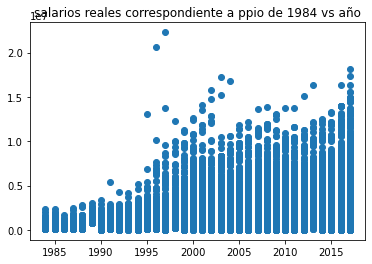

In [21]:
plt.plot(fulldata['season_start'],fulldata['salary_adj'],'o')
plt.title('salarios reales correspondiente a ppio de 1984 vs año')

Pasamos a analizar el resto del dataset para 

In [22]:
fulldata.columns

Index(['league', 'player_id', 'salary', 'season', 'season_end', 'season_start',
       'team', '_id', 'birthDate', 'birthPlace', 'career_AST', 'career_FG%',
       'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
       'career_TRB', 'career_WS', 'career_eFG%', 'college', 'draft_pick',
       'draft_round', 'draft_team', 'draft_year', 'height', 'highSchool',
       'name', 'position', 'shoots', 'weight', 'salary_adj'],
      dtype='object')

Hay varias columnas cuyo significado no conozco, de wikipedia:https://en.wikipedia.org/wiki/Basketball_statistics entre otras fuentes averiguo su significado.

AST = asistencia

FG% = porcentaje de tiro de campo (no tiro libre)

FG3% = porcentaje de tiros triples de campo

FT% = porcentaje de tiro libre

G = juegos jugados

PER =  Player efficiency rating (PER strives to measure a player's per-minute performance, while adjusting for pace.)

PTS = puntos

TRB = tasa de rebote

WS = victorias compartidas ( an estimate of the number of wins contributed by a player)

eFG =  Effective Field Goal Percentage. This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.

Draft = Los equipos de la National Basketball Association (NBA) se turnaron para seleccionar a los jugadores del baloncesto universitario de los Estados Unidos y otros jugadores elegibles, incluidos los jugadores internacionales.

In [23]:
fulldata.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14163 entries, 0 to 14162
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   league        14163 non-null  object 
 1   player_id     14163 non-null  object 
 2   salary        14163 non-null  int64  
 3   season        14163 non-null  object 
 4   season_end    14163 non-null  int64  
 5   season_start  14163 non-null  int64  
 6   team          14159 non-null  object 
 7   _id           14163 non-null  object 
 8   birthDate     14163 non-null  object 
 9   birthPlace    14163 non-null  object 
 10  career_AST    14163 non-null  float64
 11  career_FG%    14163 non-null  object 
 12  career_FG3%   14163 non-null  object 
 13  career_FT%    14163 non-null  object 
 14  career_G      14163 non-null  int64  
 15  career_PER    14163 non-null  object 
 16  career_PTS    14163 non-null  float64
 17  career_TRB    14163 non-null  object 
 18  career_WS     14163 non-nu

Como muestra la columna Dtype, muchos de los valores esan en str y no en float.

Antes de trabajar sobre las columnas , hay algunas que no son necesarias para el analisis, como la liga,el id del jugador, birthplace, collegue.

In [63]:
data = fulldata.drop(columns=['league','player_id','salary','season', 'season_end','_id', 'birthPlace','name'])

Vamos a reconvertir los datos en numeros para su posterior analisis

In [64]:
columns_stat= ['career_AST','career_FG%','career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS',
       'career_TRB', 'career_WS', 'career_eFG%']

In [65]:
for i in columns_stat:
    data[i] = pd.to_numeric(fulldata[i],errors='coerce')

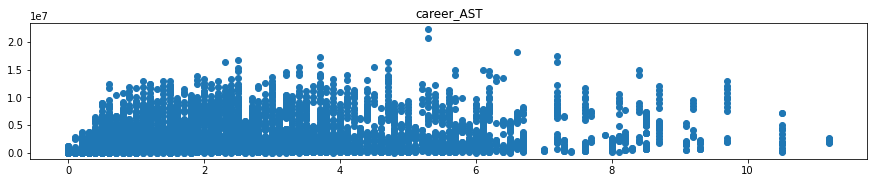

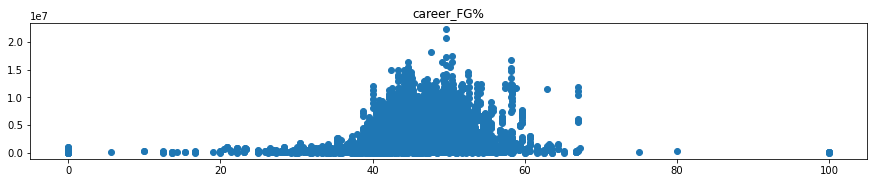

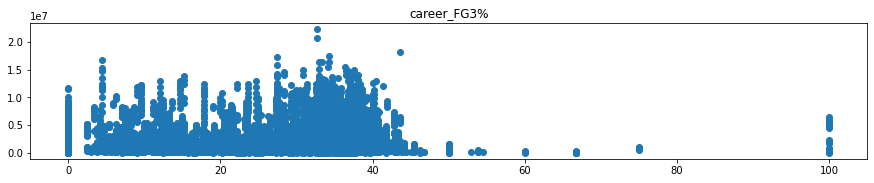

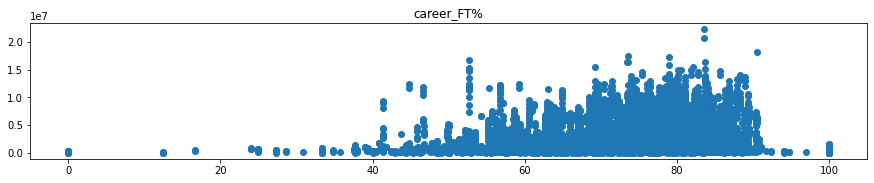

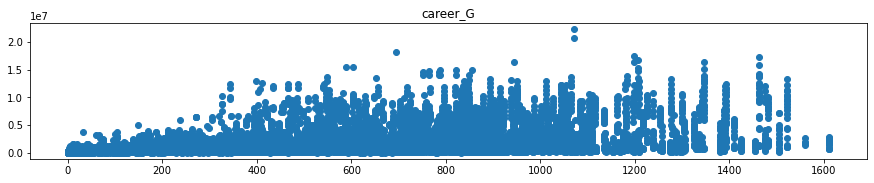

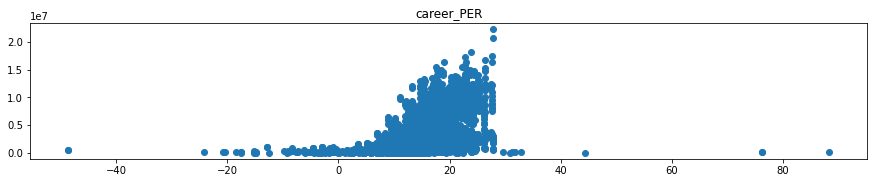

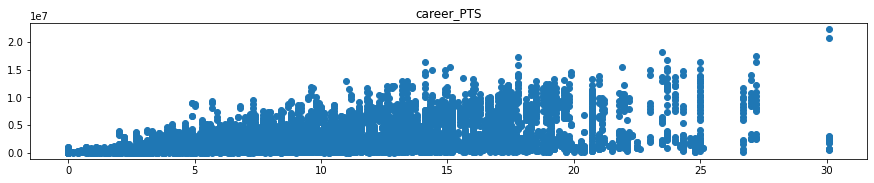

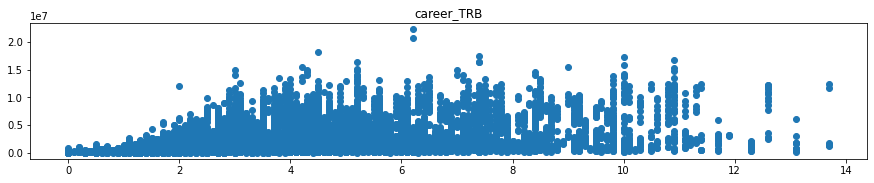

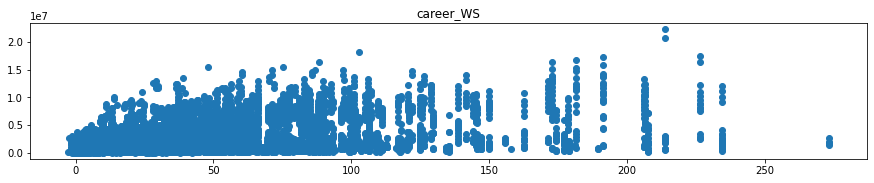

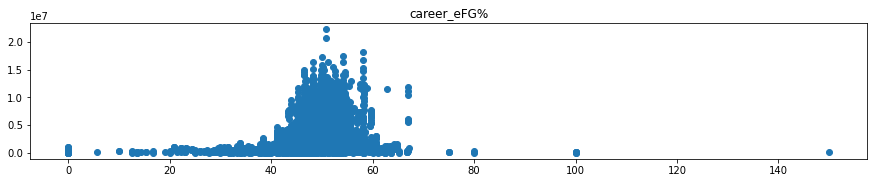

In [66]:
for i in columns_stat:
    plt.figure(figsize=[15,2.5])
    plt.plot(data[i],data['salary_adj'],'o')
    plt.title(i)

eFG% no puede ser mayor a 100, eliminar esos puntos.

In [67]:
data = data[data['career_eFG%'] <= 100]

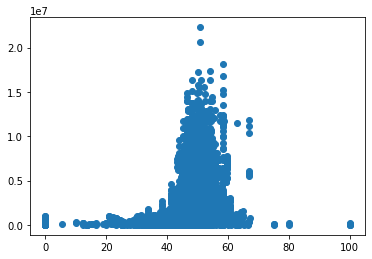

In [68]:
plt.plot(data['career_eFG%'],data['salary_adj'],'o')

In [69]:
data['birthDate'] = pd.to_datetime(data['birthDate'])

In [70]:
data['birthDate'].head()

0   1968-06-24
1   1968-06-24
2   1968-06-24
3   1968-06-24
4   1968-06-24
Name: birthDate, dtype: datetime64[ns]

Los draft pick, round and year estan definidos en como str. En el caso de las rondas y de las elecciones estan en formato numeral ordinal.

In [71]:
data.draft_pick.unique()

array(['25th overall', '1st overall', '3rd overall', '11th overall',
       '32nd overall', '60th overall', '40th overall', '37th overall',
       '4th overall', '54th overall', '22nd overall', '66th overall',
       '12th overall', '39th overall', '14th overall', nan,
       '27th overall', '28th overall', '31st overall', '20th overall',
       '50th overall', '18th overall', '53rd overall', '2nd overall',
       '29th overall', '13th overall', '8th overall', '17th overall',
       '26th overall', '49th overall', '5th overall', '33rd overall',
       '23rd overall', '21st overall', '30th overall', '10th overall',
       '44th overall', '47th overall', '15th overall', '51st overall',
       '43rd overall', '36th overall', '9th overall', '41st overall',
       '48th overall', '16th overall', '24th overall', '6th overall',
       '7th overall', '45th overall', '156th overall', '46th overall',
       '57th overall', '58th overall', '84th overall', '19th overall',
       '38th overall', '3

In [72]:
data['draft_round'] =data.draft_round.str.extract('(\d+)')
data['draft_round'] = pd.to_numeric(data['draft_round'])
data['draft_pick'] =data.draft_pick.str.extract('(\d+)')
data['draft_pick'] = pd.to_numeric(data['draft_pick'])
data['draft_year'] = pd.to_numeric(data['draft_year'])

In [73]:
data[['draft_round','draft_pick','draft_year']].head()

,draft_round,draft_pick,draft_year
0,1.0,25.0,1990.0
1,1.0,25.0,1990.0
2,1.0,25.0,1990.0
3,1.0,25.0,1990.0
4,1.0,25.0,1990.0


In [74]:
data[['draft_round','draft_pick','draft_year']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14150 entries, 0 to 14162
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   draft_round  12258 non-null  float64
 1   draft_pick   12258 non-null  float64
 2   draft_year   12258 non-null  float64
dtypes: float64(3)
memory usage: 442.2 KB


Defino una función para reconvertir los datos de la altura en el sistema anglosajon de unidades al sistema internacional.

In [75]:
data.height.unique()

array(['6-10', '7-2', '6-1', '6-6', '6-9', '6-5', '6-11', '6-7', '6-4',
       '5-10', '7-0', '6-2', '5-11', '7-1', '6-8', '6-0', '6-3', '7-5',
       '5-3', '7-7', '5-5', '7-6', '7-3', '7-4', '5-7', '5-9', '5-6'],
      dtype=object)

In [76]:
def feet_to_cm(x):
    feet = int(x[0])
    inch = int(x[-1])
    cm = feet*30.48 + inch*2.54
    return cm

In [77]:
data.height = data.height.apply(lambda x: feet_to_cm(x))

In [78]:
data.height.head()

0    182.88
1    182.88
2    182.88
3    182.88
4    182.88
Name: height, dtype: float64

Hago lo mismo con el peso

In [79]:
data.weight.unique()

array(['240lb', '225lb', '162lb', '223lb', '200lb', '185lb', '220lb',
       '210lb', '209lb', '265lb', '215lb', '255lb', '245lb', '202lb',
       '232lb', '190lb', '175lb', '248lb', '251lb', '217lb', '250lb',
       '260lb', '205lb', '230lb', '183lb', '237lb', '184lb', '213lb',
       '171lb', '270lb', '194lb', '168lb', '208lb', '249lb', '242lb',
       '176lb', '280lb', '191lb', '188lb', '170lb', '235lb', '197lb',
       '160lb', '221lb', '252lb', '177lb', '226lb', '172lb', '163lb',
       '195lb', '290lb', '201lb', '207lb', '224lb', '204lb', '180lb',
       '182lb', '360lb', '233lb', '234lb', '216lb', '136lb', '228lb',
       '258lb', '257lb', '196lb', '135lb', '227lb', '275lb', '186lb',
       '229lb', '161lb', '165lb', '214lb', '244lb', '222lb', '189lb',
       '212lb', '218lb', '285lb', '238lb', '178lb', '166lb', '253lb',
       '239lb', '295lb', '289lb', '193lb', '192lb', '300lb', '243lb',
       '164lb', '262lb', '268lb', '279lb', '152lb', '198lb', '288lb',
       '236lb', '219

In [80]:
data.weight = pd.to_numeric(data['weight'].apply(lambda x: x[:-2]))

In [81]:
data.weight.head()

0    240
1    240
2    240
3    240
4    240
Name: weight, dtype: int64

In [82]:
data.head()

,season_start,team,birthDate,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,...,draft_pick,draft_round,draft_team,draft_year,height,highSchool,position,shoots,weight,salary_adj
0,1990,Portland Trail Blazers,1968-06-24,0.3,50.2,0.0,70.1,256,13.0,5.7,...,25.0,1.0,Portland Trail Blazers,1990.0,182.88,"Bloomfield in Bloomfield, New Jersey",Power Forward,Right,240,309290.884054
1,1991,Portland Trail Blazers,1968-06-24,0.3,50.2,0.0,70.1,256,13.0,5.7,...,25.0,1.0,Portland Trail Blazers,1990.0,182.88,"Bloomfield in Bloomfield, New Jersey",Power Forward,Right,240,374394.294709
2,1992,Boston Celtics,1968-06-24,0.3,50.2,0.0,70.1,256,13.0,5.7,...,25.0,1.0,Portland Trail Blazers,1990.0,182.88,"Bloomfield in Bloomfield, New Jersey",Power Forward,Right,240,370438.216027
3,1993,Boston Celtics,1968-06-24,0.3,50.2,0.0,70.1,256,13.0,5.7,...,25.0,1.0,Portland Trail Blazers,1990.0,182.88,"Bloomfield in Bloomfield, New Jersey",Power Forward,Right,240,583642.360317
4,1994,Sacramento Kings,1968-06-24,0.3,50.2,0.0,70.1,256,13.0,5.7,...,25.0,1.0,Portland Trail Blazers,1990.0,182.88,"Bloomfield in Bloomfield, New Jersey",Power Forward,Right,240,462520.296298


Trabajamos con el contenido de las columnas remanetes.

In [83]:
data.team =data.team.apply(lambda x: str(x))
data.college =data.college.apply(lambda x: str(x))
data.highSchool = data.highSchool.apply(lambda x: str(x))
data.position = data.position.apply(lambda x: str(x))
data.shoots = data.shoots.apply(lambda x: str(x))
data.draft_team = data.draft_team.apply(lambda x: str(x))

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14150 entries, 0 to 14162
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   season_start  14150 non-null  int64         
 1   team          14150 non-null  object        
 2   birthDate     14150 non-null  datetime64[ns]
 3   career_AST    14150 non-null  float64       
 4   career_FG%    14150 non-null  float64       
 5   career_FG3%   13661 non-null  float64       
 6   career_FT%    14074 non-null  float64       
 7   career_G      14150 non-null  int64         
 8   career_PER    14150 non-null  float64       
 9   career_PTS    14150 non-null  float64       
 10  career_TRB    14150 non-null  float64       
 11  career_WS     14150 non-null  float64       
 12  career_eFG%   14150 non-null  float64       
 13  college       14150 non-null  object        
 14  draft_pick    12258 non-null  float64       
 15  draft_round   12258 non-null  float6

C:\Users\laure\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


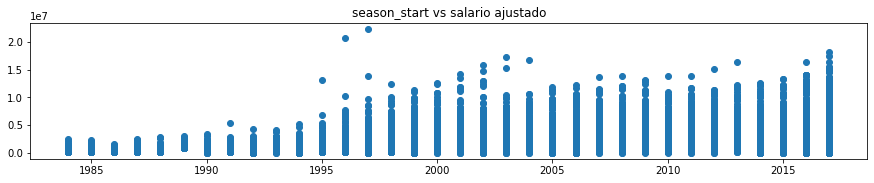

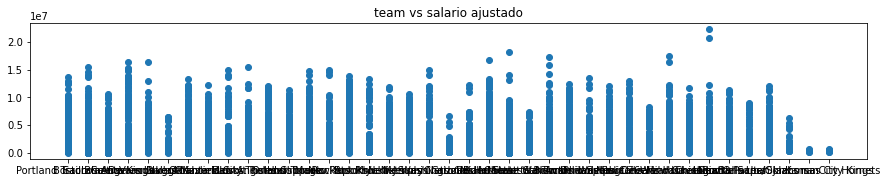

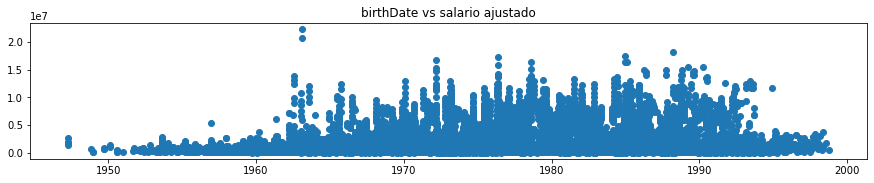

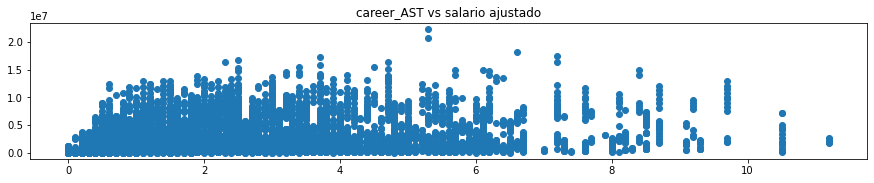

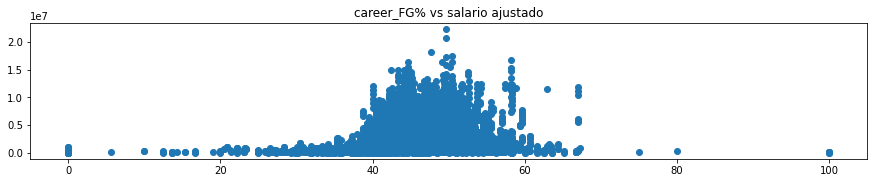

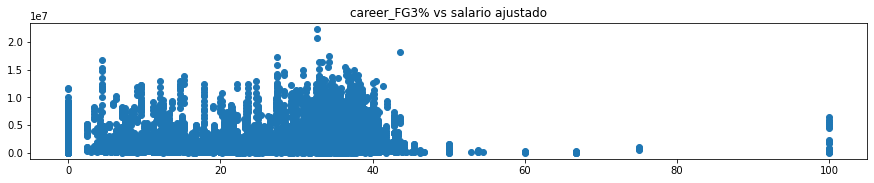

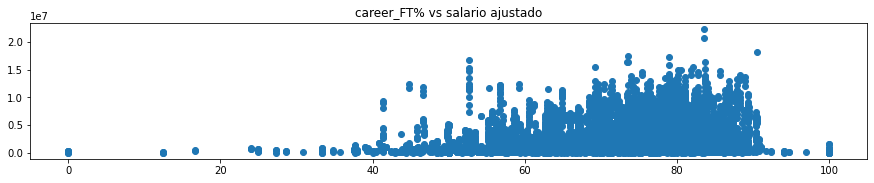

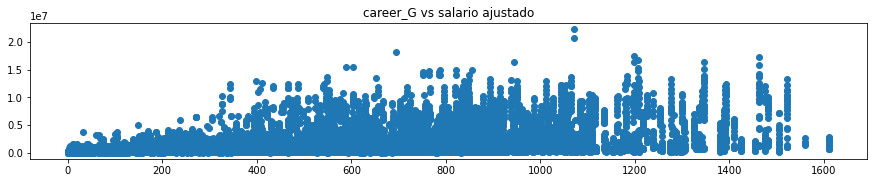

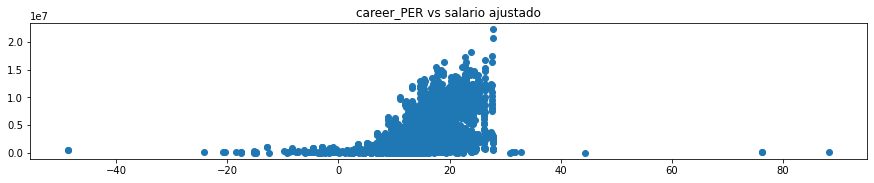

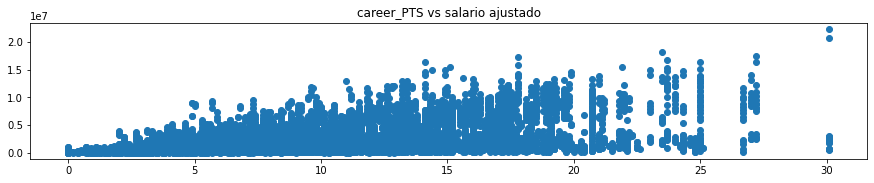

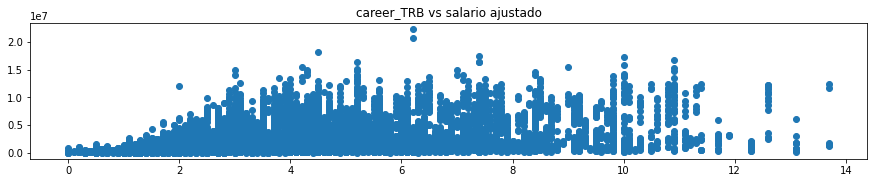

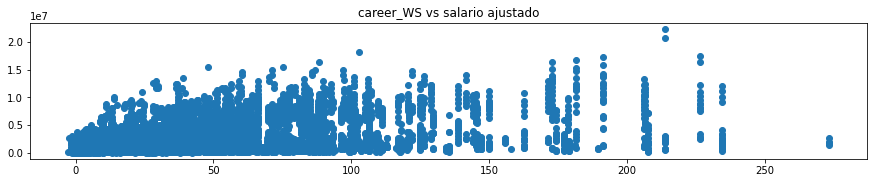

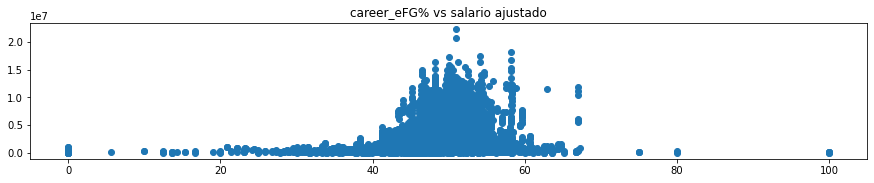

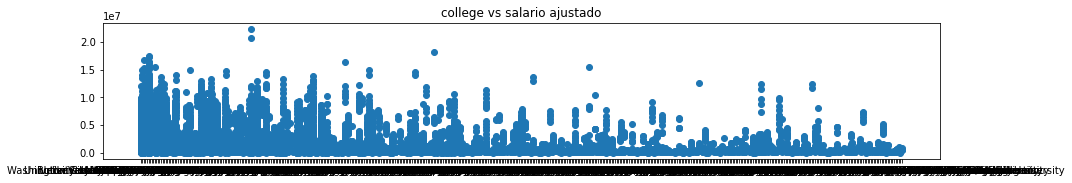

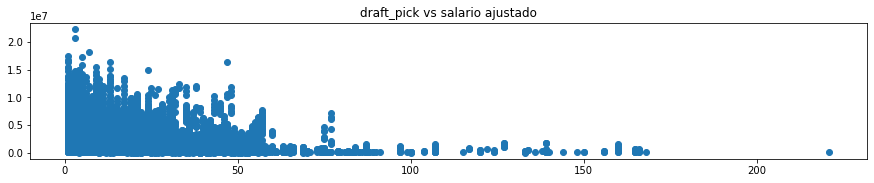

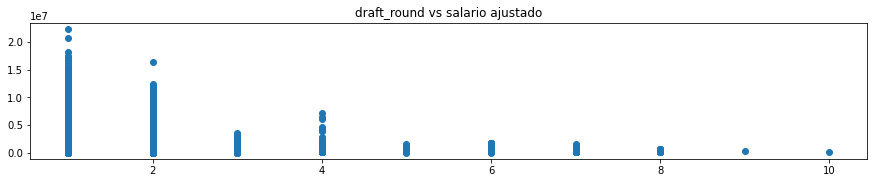

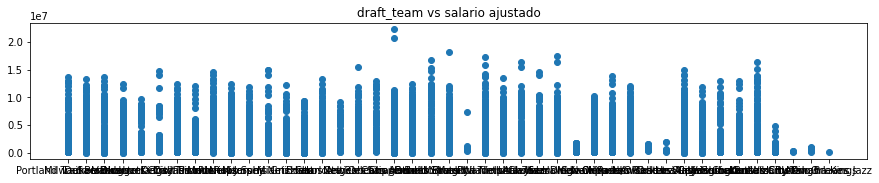

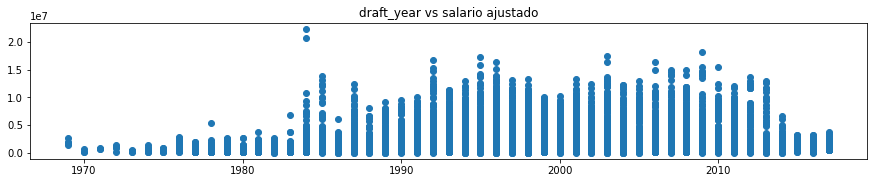

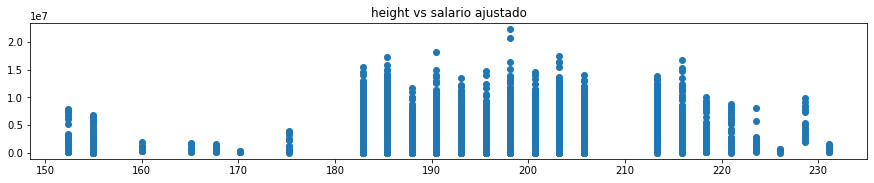

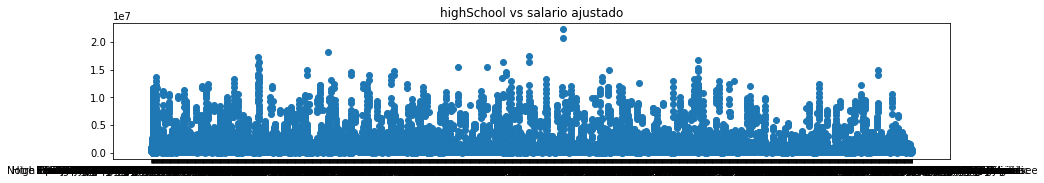

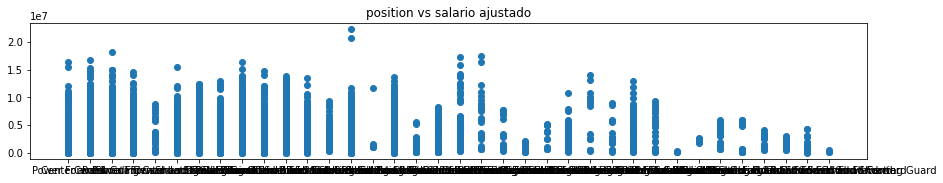

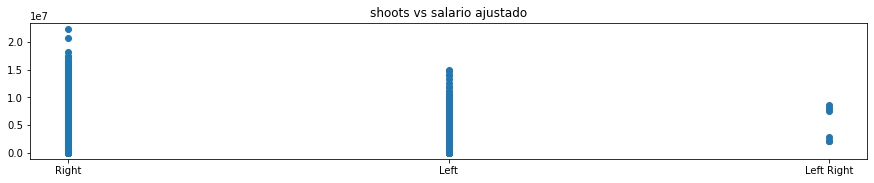

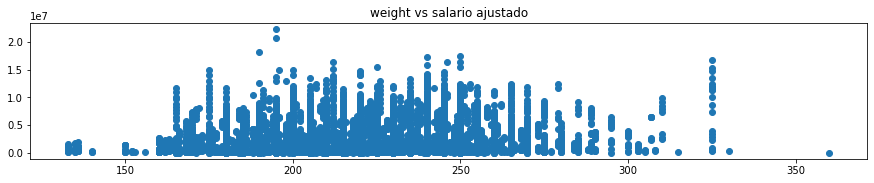

In [85]:
for i in list(data.columns)[:-1]:
    plt.figure(figsize=[15,2.5])
    plt.plot(data[i],data['salary_adj'],'o')
    plt.title(i+' vs salario ajustado')

claramente hay algunas variables que no aportan mas informacion a la regresión:
teams,college, draft_teams,hightSchool

In [86]:
data = data.drop(columns=['team','college','draft_team','highSchool'])

In [87]:
data.columns

Index(['season_start', 'birthDate', 'career_AST', 'career_FG%', 'career_FG3%',
       'career_FT%', 'career_G', 'career_PER', 'career_PTS', 'career_TRB',
       'career_WS', 'career_eFG%', 'draft_pick', 'draft_round', 'draft_year',
       'height', 'position', 'shoots', 'weight', 'salary_adj'],
      dtype='object')

Para trabajar con los modelos de regresión podemos aplicar un arbol de regresión.

Primeros vemos si hay valores con NaN

In [88]:
data.isna().sum()

season_start       0
birthDate          0
career_AST         0
career_FG%         0
career_FG3%      489
career_FT%        76
career_G           0
career_PER         0
career_PTS         0
career_TRB         0
career_WS          0
career_eFG%        0
draft_pick      1892
draft_round     1892
draft_year      1892
height             0
position           0
shoots             0
weight             0
salary_adj         0
dtype: int64

In [89]:
data = data.dropna()

In [90]:
data.isna().sum()

season_start    0
birthDate       0
career_AST      0
career_FG%      0
career_FG3%     0
career_FT%      0
career_G        0
career_PER      0
career_PTS      0
career_TRB      0
career_WS       0
career_eFG%     0
draft_pick      0
draft_round     0
draft_year      0
height          0
position        0
shoots          0
weight          0
salary_adj      0
dtype: int64

Para el arbol de regresión debemos primero hacer numericos los valores en texto. Para esto, en los foros recomendaban usar la función One Hot Encoder de Skcit-Learn

In [93]:
X = data[list(data.columns)[:-1]]
Y = data['salary_adj']

In [94]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X)

OneHotEncoder(handle_unknown='ignore')

In [95]:
enc.categories_

[array([1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
        1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
        2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
        2017], dtype=int64),
 array(['1947-04-16T00:00:00.000000000', '1948-10-25T00:00:00.000000000',
        '1948-12-18T00:00:00.000000000', ...,
        '1998-05-17T00:00:00.000000000', '1998-05-29T00:00:00.000000000',
        '1998-07-28T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
         2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
         3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
         4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
         5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
         6.6,  6.7,  7. ,  7.2,  7.3,  7.4, 

In [96]:
X = enc.transform(X)

Dividimos los datos en entrenamiento y en test.

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1) 

In [101]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, Y_train)

In [102]:
clf.get_depth()

202

In [103]:
clf.score(X_test, Y_test)

0.04809518305531402

Muy bajo el score!!

Probamos ahora con una regresión lineal.

In [112]:
X = data[list(data.columns)[:-1]]
Y = data['salary_adj']

In [113]:
import datetime as dt
X.birthDate = X.birthDate.map(dt.datetime.toordinal)

C:\Users\laure\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [114]:
X.birthDate.head()

0    718607
1    718607
2    718607
3    718607
4    718607
Name: birthDate, dtype: int64

In [115]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X)

OneHotEncoder(handle_unknown='ignore')

In [116]:
X = enc.transform(X)

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1) 

In [118]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)

In [119]:
reg.score(X_train,Y_train)

0.6139331549905817

In [120]:
print(reg.coef_)

[-2346640.39367851 -2365309.1630316  -2292994.92413001 ...
   -59827.32920835   247447.49257952   326928.74797694]


In [121]:
reg.score(X_test,Y_test)

0.4616675121760151

Cuando usamos estos coeficientes para predecir lo salarios, no obtenemos un score mejor que el árbol de regresión.

Probamos con el modelo RANSAC

In [122]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(random_state=0).fit(X_train,Y_train)

In [123]:
ransac.score(X_train,Y_train)

0.5154856052365571

In [124]:
ransac.score(X_test,Y_test)

0.3885303251533283

El modelo de regresión lineal parece ser el más robusto de todos los métodos.